<font size="5"> Document: Police Stop and Search Data Analysis

# 1. Stop and Search Data Extraction (preprocessing already done in the "useful_functions" program I created)

In [1]:
import requests
import pandas as pd
import useful_functions     



#force1 = "cleveland"
force2 = "durham"
date = "2020-07"

#df_cleveland = useful_functions.Stop_and_Search_Data(force1, date)
df_force_date = useful_functions.Stop_and_Search_Data(force2, date)

#df_cleveland

df_force_date

,age_range,outcome,involved_person,gender,datetime,ethnicity,type,object_of_search
0,over 34,Arrest,True,Male,2020-07-01,White,Person and Vehicle search,Controlled drugs
1,18-24,A no further action disposal,True,Male,2020-07-01,White,Person and Vehicle search,Controlled drugs
2,18-24,A no further action disposal,True,Male,2020-07-01,White,Person and Vehicle search,Controlled drugs
3,18-24,A no further action disposal,True,Female,2020-07-01,White,Person and Vehicle search,Offensive weapons
4,25-34,A no further action disposal,True,Male,2020-07-01,White,Person and Vehicle search,Offensive weapons
...,...,...,...,...,...,...,...,...
184,18-24,Summons / charged by post,True,Male,2020-07-30,White,Person search,Article for use in theft
185,25-34,Community resolution,True,Other,2020-07-30,White,Person search,Offensive weapons
186,18-24,A no further action disposal,True,Male,2020-07-31,White,Person search,Offensive weapons
187,over 34,A no further action disposal,True,Other,2020-07-31,White,Person search,Offensive weapons


# 2. Breakdown of age ranges for stop and search for a given police force in a given month


In [2]:
df_age_range = pd.DataFrame()
df_age_range = df_age_range.append(df_force_date['age_range'].value_counts()).T
df_age_range.reset_index(inplace=True)
df_age_range = df_age_range.rename(columns={'index': 'Age Range','age_range': 'Frequency'})
df_age_range

,Age Range,Frequency
0,10-17,24.0
1,18-24,67.0
2,25-34,43.0
3,Unspecified,7.0
4,over 34,48.0


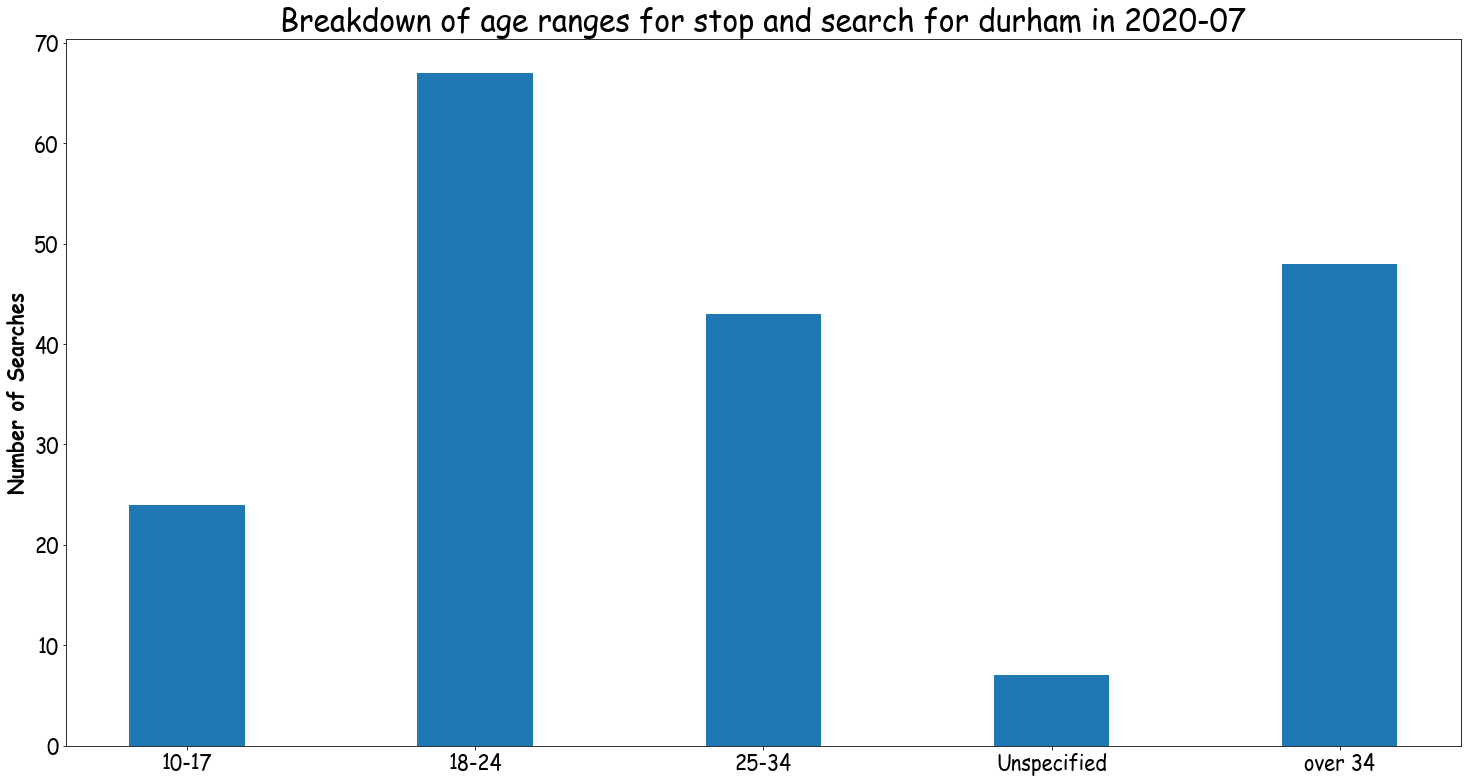

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.family':'fantasy'})

plt.figure(figsize = (25,13))
X = df_age_range['Age Range']
area_a = df_age_range['Frequency']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, area_a, 0.4)
  
plt.xticks(X_axis, X, size= 20)
plt.yticks(size= 20)
plt.ylabel('Number of Searches', fontsize =20, fontweight='bold')
plt.title('Breakdown of age ranges for stop and search for '+force2+' in '+date, fontsize =30)

plt.show()

#### There are more stop and search of people between 18-24 for durham in 2020-07

# 3. Considering a month during the COVID-19 lockdowns and the same month in 2021
### Using April 2020 as an example
### Stop and search incidents

In [4]:
force1 = "cleveland"
lockdowns = ["2020-04", "2021-04"]

searches = [] # List for searches in respective months
for lock_down in lockdowns:
    lockdownyear = useful_functions.Stop_and_Search_Data(force1, lock_down)
    total_search = len(lockdownyear)
    searches.append(total_search)
    
    searches_sex = lockdownyear['gender'].value_counts().sort_index(ascending=True)
    
    print('There were '+str(total_search)+' searches in '+lock_down+': '+str(searches_sex[0])+' female(s) and '+str(searches_sex[1])+' male(s)')

# There are also some unspecified genders

There were 433 searches in 2020-04: 33 female(s) and 348 male(s)
There were 548 searches in 2021-04: 63 female(s) and 443 male(s)


# 4. Considering a month during the COVID-19 lockdowns and the same month in 2021
#### Stop and search incidents where the outcome resulted in an arrest
#### Using April as an example

In [5]:
force1 = "cleveland"
lockdowns = ["2020-04", "2021-04"]
arrests = [] # List for arrests in respective months
for lock_down in lockdowns:
    lockdownyear = useful_functions.Stop_and_Search_Data(force1, lock_down)
    
    df_arrest = pd.DataFrame()
    df_arrest = df_arrest.append(lockdownyear['outcome'].value_counts()).T
    df_arrest.reset_index(inplace=True)
    df_arrest = df_arrest.rename(columns={'index': 'Outcome','outcome': 'Frequency'})
    total_arrests = round(df_arrest.loc[df_arrest['Outcome'] == 'Arrest', 'Frequency'].item())
    arrests.append(total_arrests)
    
    df_arrests = lockdownyear[lockdownyear["outcome"] == "Arrest"].copy() #Analysing sex demography of arrests
    arrest_sex = df_arrests['gender'].value_counts().sort_index(ascending=True)
    
    print('There were '+str(total_arrests)+' arrests in '+lock_down+': '+str(arrest_sex[0])+' female(s) and '+str(arrest_sex[1])+' male(s)')
    
if arrests[0] > arrests[1]:
    print(force1+' had reduced stop and search arrests in '+lockdowns[1]+' with '+str(arrests[1])+' arrests in comparison to '+str(arrests[0])+' arrests in '+lockdowns[0])
elif arrests[0] < arrests[1]:
    print(force1+' had increased stop and search arrests in '+lockdowns[1]+' with '+str(arrests[1])+' arrests in comparison to '+str(arrests[0])+' arrests in '+lockdowns[0])
else:
    print(force1+' had the same amount of stop and search arrests in 2020 and 2021')

There were 35 arrests in 2020-04: 31 female(s) and 4 male(s)
There were 67 arrests in 2021-04: 8 female(s) and 59 male(s)
cleveland had increased stop and search arrests in 2021-04 with 67 arrests in comparison to 35 arrests in 2020-04


In [6]:
df_arrests = lockdownyear[lockdownyear["outcome"] == "Arrest"].copy()
df_arrests

,age_range,outcome,involved_person,gender,datetime,ethnicity,type,object_of_search
10,over 34,Arrest,True,Male,2021-04-01,White,Person search,Article for use in theft
14,over 34,Arrest,True,Male,2021-04-01,White,Person search,Controlled drugs
22,over 34,Arrest,True,Male,2021-04-01,White,Person search,Article for use in theft
28,over 34,Arrest,True,Male,2021-04-02,White,Person search,Controlled drugs
35,25-34,Arrest,True,Female,2021-04-03,White,Person search,Evidence of offences under the Act
...,...,...,...,...,...,...,...,...
503,18-24,Arrest,True,Male,2021-04-28,White,Person search,Firearms
516,25-34,Arrest,True,Male,2021-04-29,White,Person search,Controlled drugs
533,25-34,Arrest,True,Male,2021-04-30,White,Person search,Controlled drugs
534,25-34,Arrest,True,Male,2021-04-30,White,Person search,Controlled drugs


# 5. How many young adults (18-24) were stopped and searched by
####  Cleveland Police and Durham Police forces in the month of summer months of 2021?

In [7]:
summer_months = ['2021-07', '2021-08', '2021-09']
areas = ['cleveland', 'durham']

young_adults=[]
summer=[]
area_names=[]
new_df = pd.DataFrame()
for area in areas:
    for month in summer_months:
        df1 = useful_functions.Stop_and_Search_Data(area, month)
        young_adults.append(df1['age_range'].value_counts()['18-24']) # young adults (18-24) selected
        summer.append(month)
        area_names.append(area)
    new_df[area] = young_adults
    young_adults=[]

new_df['Date']=summer_months
new_df=new_df.iloc[:,[2,0,1]]
new_df

,Date,cleveland,durham
0,2021-07,90,90
1,2021-08,86,58
2,2021-09,62,32


# 6. Comparison of two areas concerning young adults (18-24) stopped and searched in the summer months of 2021

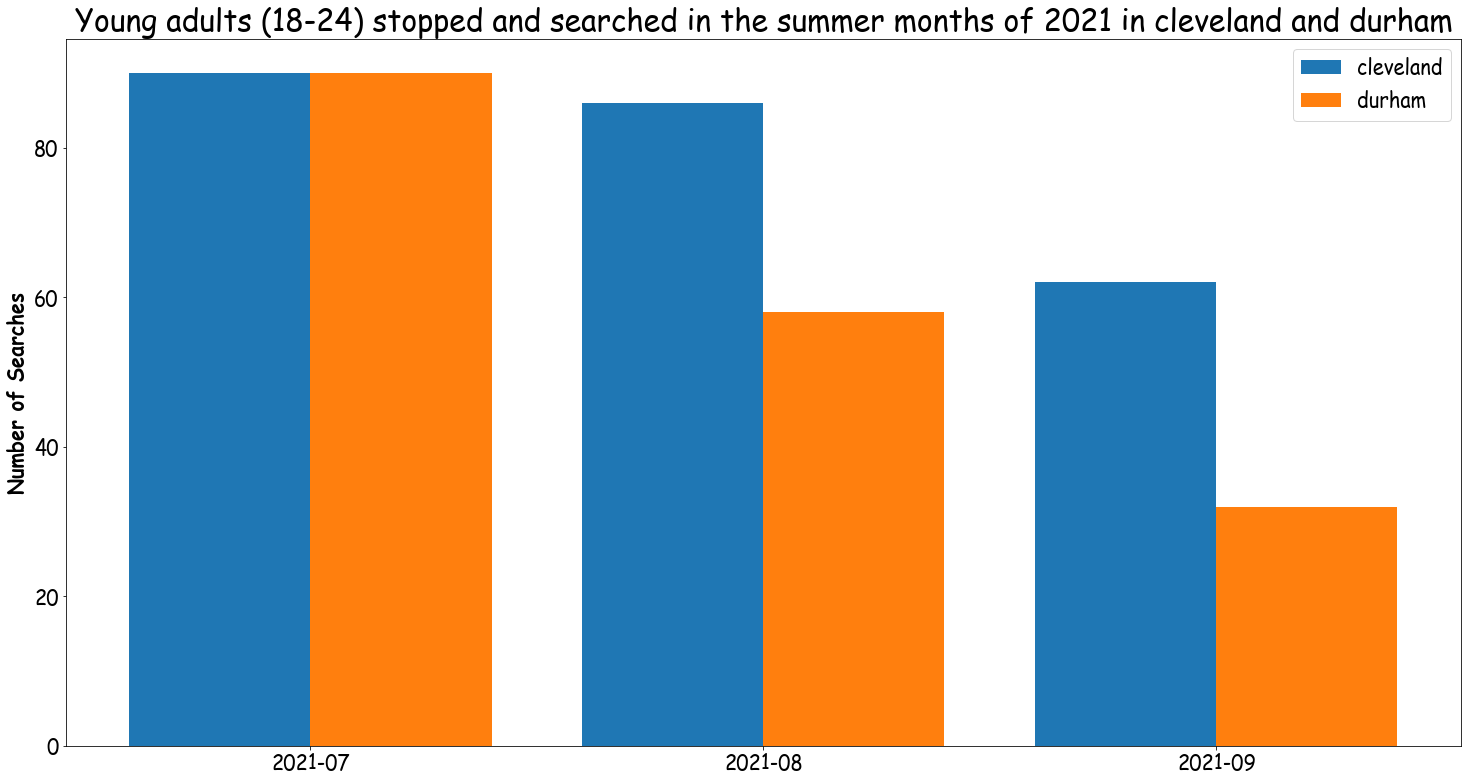

In [8]:
plt.figure(figsize = (25,13))
X = new_df['Date']
area_a = new_df[areas[0]]
area_b = new_df[areas[1]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, area_a, 0.4, label = areas[0])
plt.bar(X_axis + 0.2, area_b, 0.4, label = areas[1])
  
plt.xticks(X_axis, summer_months, size= 20)
plt.yticks(size= 20)
#plt.xlabel('Date', fontsize =20, fontweight='bold')
plt.ylabel('Number of Searches', fontsize =20, fontweight='bold')
plt.title("Young adults (18-24) stopped and searched in the summer months of 2021 in "+areas[0]+' and '+areas[1], fontsize =30)
plt.legend(fontsize=20)
plt.show()

# 7. How many young adults (18-24) were arrested by 

#### Cleveland Police and Durham Police forces in the month of summer months of 2021?

In [9]:
summer_months = ['2021-07', '2021-08', '2021-09']
areas = ['cleveland', 'durham']

young_adults=[]
summer=[]
area_names=[]
new_df2 = pd.DataFrame()
for area in areas:
    for month in summer_months:
        df1 = useful_functions.Stop_and_Search_Data(area, month)
        df_arrests2 = df1[df1["outcome"] == "Arrest"].copy()
        young_adults.append(df_arrests2['age_range'].value_counts()['18-24']) # young adults (18-24) selected
        summer.append(month)
        area_names.append(area)
    new_df2[area] = young_adults    
    young_adults=[]
        
new_df2['Date']=summer_months
new_df2=new_df2.iloc[:,[2,0,1]]
new_df2

,Date,cleveland,durham
0,2021-07,12,7
1,2021-08,16,9
2,2021-09,6,6


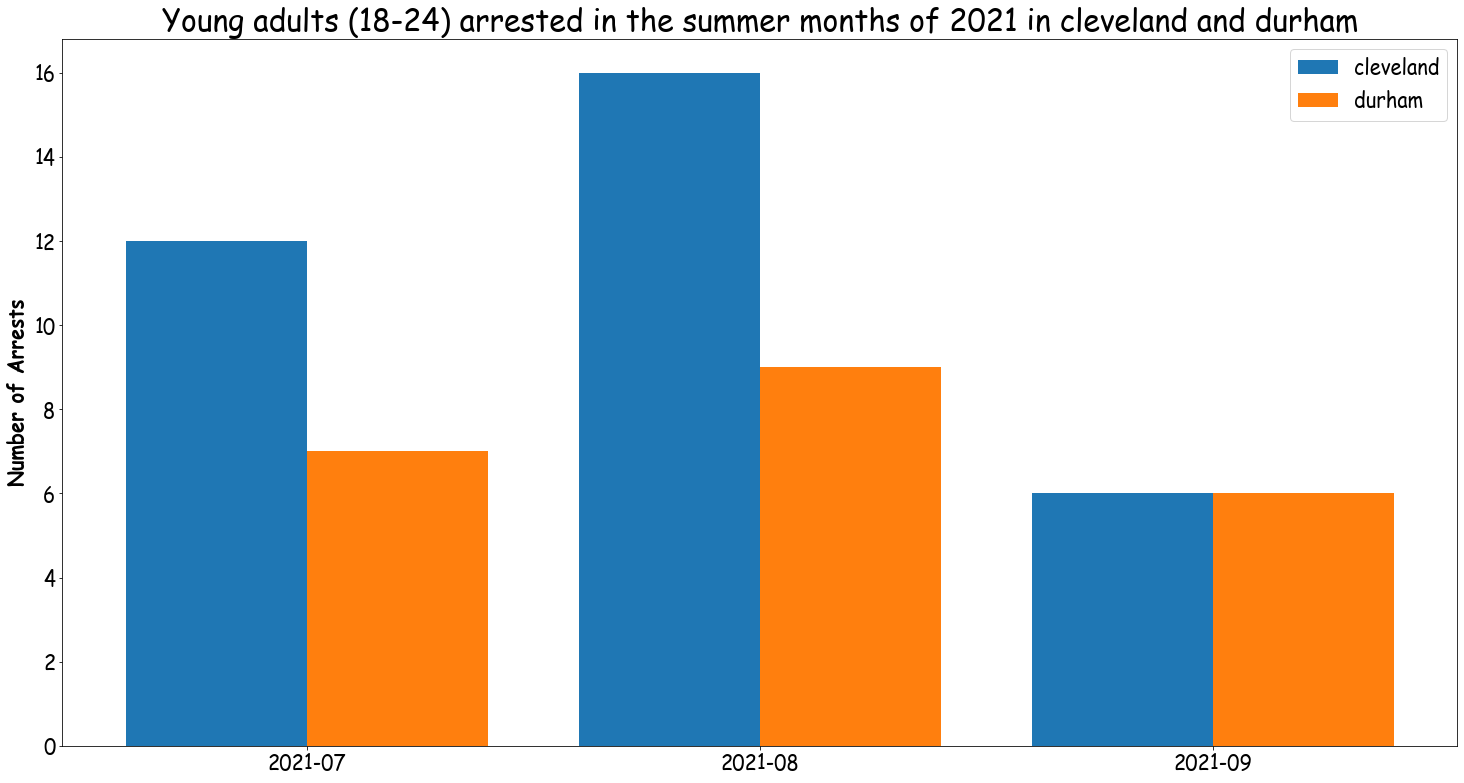

In [10]:
plt.figure(figsize = (25,13))
X = new_df2['Date']
area_a = new_df2[areas[0]]
area_b = new_df2[areas[1]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, area_a, 0.4, label = areas[0])
plt.bar(X_axis + 0.2, area_b, 0.4, label = areas[1])
  
plt.xticks(X_axis, summer_months, size= 20)
plt.yticks(size= 20)
#plt.xlabel('Date', fontsize =20, fontweight='bold')
plt.ylabel('Number of Arrests', fontsize =20, fontweight='bold')
plt.title("Young adults (18-24) arrested in the summer months of 2021 in "+areas[0]+' and '+areas[1], fontsize =30)
plt.legend(fontsize=20)
plt.show()